## 雙變量分析

#### 先將球員各位置，區分為四個基本位置

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('player_cleaned.csv')
#將足球球員對應的球場位置，區分為「前鋒、中場、後衛、守門員」四個基本位置
conditions = [
    (data['Position'].isin(["CAM", "CDM", "CM", "LWB", "RWB","RW"])),
    (data['Position'] == "GK"),
    (data['Position'].isin(["CB", "LB", "RB", "SW"])),
    (data['Position'].isin(["CF", "LF", "LW", "RF", "ST", "LM", "RM"]))
]

values = ['Midfielder', 'GoalKeeper', 'Defender', 'Forward']

data['short_position'] = np.select(conditions, values)

print(data)
data.to_csv('player_position_with_short.csv', index=False)

#### 卡方統計: 證明在中場位置中，12個星座人數有差異

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_8699/2203125668.py:47: DeprecationWarning: Please use `chisquare` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  chi_statistic, p_value = cy.stats.chisquare(F_star_sign_count["Position"])


卡方统计量: 124.96153846153845
P-value: 1.8148905653888945e-21
拒绝虛無架設：12個星座的人數統計上有差異。


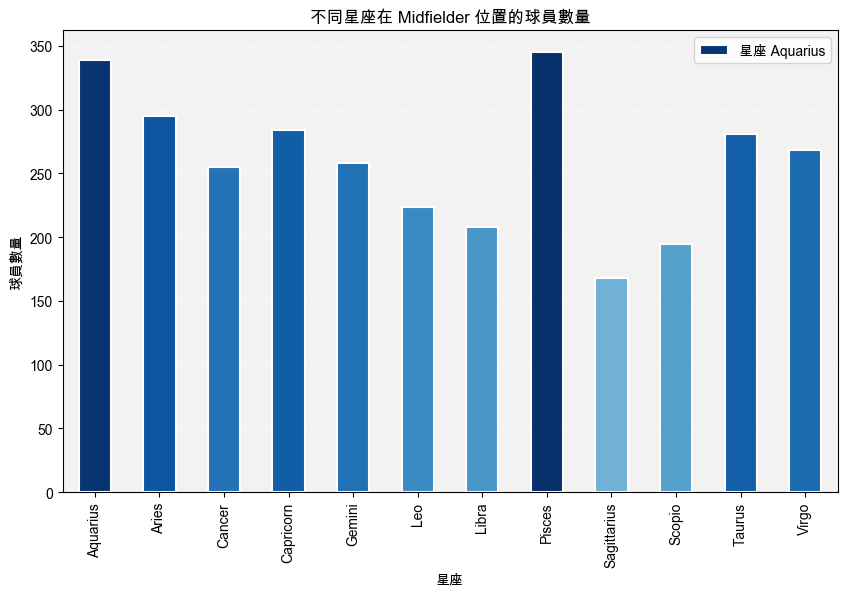

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as cy

player = pd.read_csv("player_position_with_short.csv")

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 按照position分组
player_by_position = player.groupby(["short_position"])

# 各別position的dataframe
Forward = player_by_position.get_group(('Forward'))
Midfielder = player_by_position.get_group(('Midfielder'))
Defender = player_by_position.get_group(('Defender'))
GoalKeeper = player_by_position.get_group(('GoalKeeper'))

# 個別position按照星座分組，並計數
F_star_sign_count = Midfielder.groupby("star_sign").count()

# 使用天空藍色系
cmap = plt.get_cmap("Blues")  

# 創建圖表
fig, ax = plt.subplots(figsize=(10, 6))

# 添加淡灰色背景
ax.set_facecolor('#f2f2f2')
ax.set_axisbelow(True)

#繪製長條圖
bars = F_star_sign_count["Position"].plot(kind="bar", color=cmap(F_star_sign_count["Position"] / max(F_star_sign_count["Position"])))

# 設置邊框顏色和寬度
for bar in bars.patches:
    bar.set_edgecolor('white')
    bar.set_linewidth(1.5)

#標題
plt.title("不同星座在 Midfielder 位置的球員數量")
plt.xlabel("星座")
plt.ylabel("球員數量")

# 卡方檢定
expected_value = np.mean(F_star_sign_count["Position"])
chi_statistic, p_value = cy.stats.chisquare(F_star_sign_count["Position"])

alpha = 0.05  # 顯著性水平
print("卡方统计量:", chi_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("拒绝虛無架設：12個星座的人數統計上有差異。")
else:
    print("未能拒绝虛無架設：2個星座的人數統計上無差異。")

legend = ax.legend([f"星座 {x}" for x in F_star_sign_count.index], loc='upper right')

# 顯示網格線
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='white')

#for bar in bars.patches:
    #height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


#### 卡方統計: 證明在守門員位置中，12個星座人數有差異

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_33210/3213729304.py:50: DeprecationWarning: Please use `chisquare` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  chi_statistic, p_value = cy.stats.chisquare(F_star_sign_count["Position"])


卡方統計量: 33.15673981191223
P-value: 0.0004962547449236439
拒絕虛無假設：12個星座的人數統計上有差異。


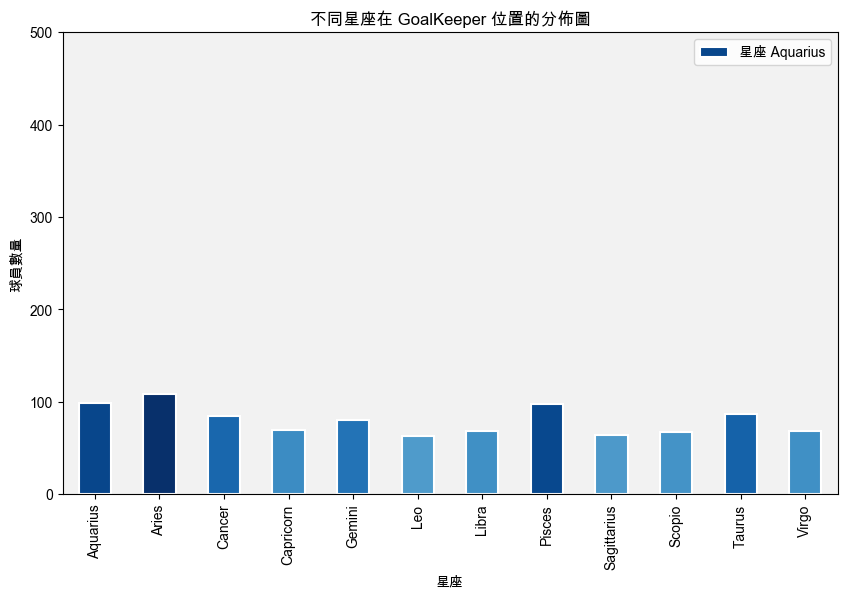

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as cy

# 讀取數據
player = pd.read_csv("player_position_with_short.csv")

# 按照位置分組
player_by_position = player.groupby(["short_position"])

# 個別位置的數據框
Forward = player_by_position.get_group(('Forward'))
Midfielder = player_by_position.get_group(('Midfielder'))
Defender = player_by_position.get_group(('Defender'))
GoalKeeper = player_by_position.get_group(('GoalKeeper'))

# 按照星座分組，並計數
F_star_sign_count = GoalKeeper.groupby("star_sign").count()

cmap = plt.get_cmap("Blues")  

# 創建圖表
fig, ax = plt.subplots(figsize=(10, 6))

# 添加淺灰色背景
ax.set_facecolor('#f2f2f2')

# 設置網格線放在背景下，並且為白色
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='white')
plt.ylim(0, 500)

# 繪制垂直長條圖
bars = F_star_sign_count["Position"].plot(kind="bar", color=cmap(F_star_sign_count["Position"] / max(F_star_sign_count["Position"])))

# 為每個長條設置邊框顏色和寬度
for bar in bars.patches:
    bar.set_edgecolor('white')
    bar.set_linewidth(1.5)

# 添加標題
plt.title("不同星座在 GoalKeeper 位置的分佈圖")

# 添加標籤
plt.xlabel("星座")
plt.ylabel("球員數量")

# 卡方檢定
expected_value = np.mean(F_star_sign_count["Position"])
chi_statistic, p_value = cy.stats.chisquare(F_star_sign_count["Position"])

# 顯示結果
alpha = 0.05  # 顯著性水平
print("卡方統計量:", chi_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("拒絕虛無假設：12個星座的人數統計上有差異。")
else:
    print("未能拒絕虛無假設：12個星座的人數統計上無差異。")

# 創建圖例並放置在圖表旁邊
legend = ax.legend([f"星座 {x}" for x in F_star_sign_count.index], loc='upper right')

# 添加標籤
#for bar in bars.patches:
    #height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

# 顯示圖表
plt.show()


#### 卡方統計: 證明在後衛位置中，12個星座人數有差異

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_8699/1375739427.py:50: DeprecationWarning: Please use `chisquare` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  chi_statistic, p_value = cy.stats.chisquare(F_star_sign_count["Position"])


卡方統計量: 105.34308943089432
P-value: 1.553295241939367e-17
拒絕虛無假設：12個星座的人數統計上有差異。


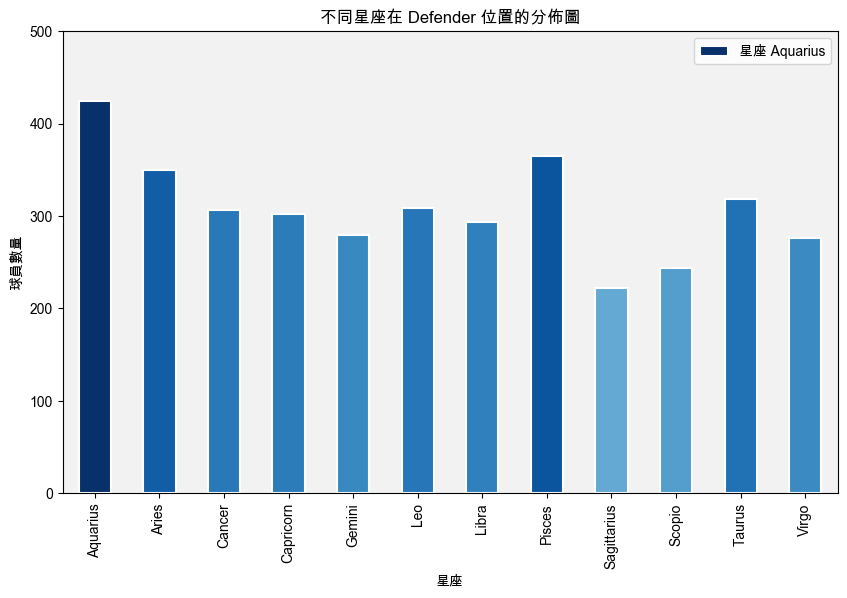

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as cy

# 讀取數據
player = pd.read_csv("player_position_with_short.csv")

# 按照位置分組
player_by_position = player.groupby(["short_position"])

# 個別位置的數據框
Forward = player_by_position.get_group(('Forward'))
Midfielder = player_by_position.get_group(('Midfielder'))
Defender = player_by_position.get_group(('Defender'))
GoalKeeper = player_by_position.get_group(('GoalKeeper'))

# 按照星座分組，並計數
F_star_sign_count = Defender.groupby("star_sign").count()

cmap = plt.get_cmap("Blues")  

# 創建圖表
fig, ax = plt.subplots(figsize=(10, 6))

# 添加淺灰色背景
ax.set_facecolor('#f2f2f2')

# 設置網格線放在背景下，並且為白色
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='white')
plt.ylim(0, 500)

# 繪制垂直長條圖
bars = F_star_sign_count["Position"].plot(kind="bar", color=cmap(F_star_sign_count["Position"] / max(F_star_sign_count["Position"])))

# 為每個長條設置邊框顏色和寬度
for bar in bars.patches:
    bar.set_edgecolor('white')
    bar.set_linewidth(1.5)

# 添加標題
plt.title("不同星座在 Defender 位置的分佈圖")

# 添加標籤
plt.xlabel("星座")
plt.ylabel("球員數量")

# 卡方檢定
expected_value = np.mean(F_star_sign_count["Position"])
chi_statistic, p_value = cy.stats.chisquare(F_star_sign_count["Position"])

# 顯示結果
alpha = 0.05  # 顯著性水平
print("卡方統計量:", chi_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("拒絕虛無假設：12個星座的人數統計上有差異。")
else:
    print("未能拒絕虛無假設：12個星座的人數統計上無差異。")

# 創建圖例並放置在圖表旁邊
legend = ax.legend([f"星座 {x}" for x in F_star_sign_count.index], loc='upper right')

# 添加標籤
#for bar in bars.patches:
    #height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

# 顯示圖表
plt.show()

#### 卡方統計: 證明在前鋒位置中，12個星座人數有差異

/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_8699/2228727886.py:50: DeprecationWarning: Please use `chisquare` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  chi_statistic, p_value = cy.stats.chisquare(F_star_sign_count["Position"])


卡方統計量: 37.50510677808728
P-value: 9.479458624268996e-05
拒絕虛無假設：12個星座的人數統計上有差異。


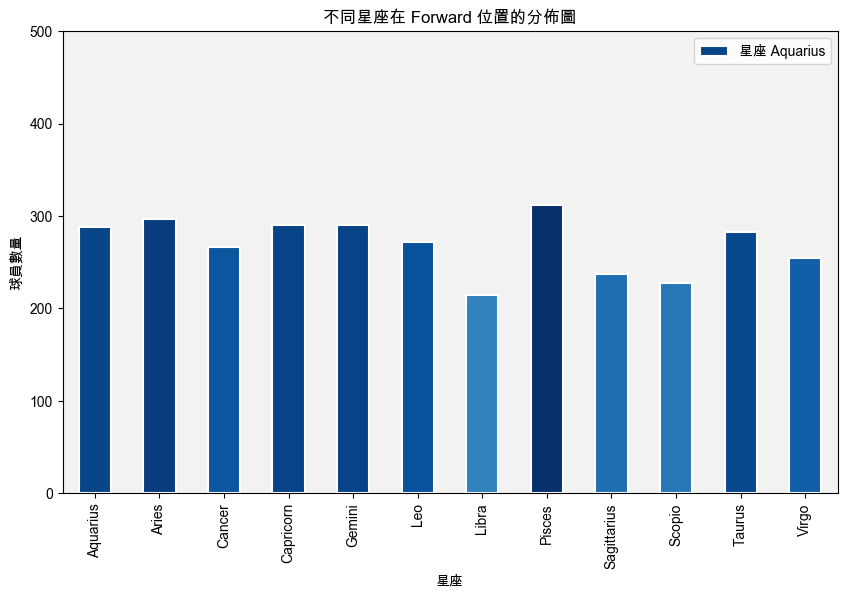

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as cy

# 讀取數據
player = pd.read_csv("player_position_with_short.csv")

# 按照位置分組
player_by_position = player.groupby(["short_position"])

# 個別位置的數據框
Forward = player_by_position.get_group(('Forward'))
Midfielder = player_by_position.get_group(('Midfielder'))
Defender = player_by_position.get_group(('Defender'))
GoalKeeper = player_by_position.get_group(('GoalKeeper'))

# 按照星座分組，並計數
F_star_sign_count = Forward.groupby("star_sign").count()

cmap = plt.get_cmap("Blues")  

# 創建圖表
fig, ax = plt.subplots(figsize=(10, 6))

# 添加淺灰色背景
ax.set_facecolor('#f2f2f2')

# 設置網格線放在背景下，並且為白色
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='white')
plt.ylim(0, 500)

# 繪制垂直長條圖
bars = F_star_sign_count["Position"].plot(kind="bar", color=cmap(F_star_sign_count["Position"] / max(F_star_sign_count["Position"])))

# 為每個長條設置邊框顏色和寬度
for bar in bars.patches:
    bar.set_edgecolor('white')
    bar.set_linewidth(1.5)

# 添加標題
plt.title("不同星座在 Forward 位置的分佈圖")

# 添加標籤
plt.xlabel("星座")
plt.ylabel("球員數量")

# 卡方檢定
expected_value = np.mean(F_star_sign_count["Position"])
chi_statistic, p_value = cy.stats.chisquare(F_star_sign_count["Position"])

# 顯示結果
alpha = 0.05  # 顯著性水平
print("卡方統計量:", chi_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("拒絕虛無假設：12個星座的人數統計上有差異。")
else:
    print("未能拒絕虛無假設：12個星座的人數統計上無差異。")

# 創建圖例並放置在圖表旁邊
legend = ax.legend([f"星座 {x}" for x in F_star_sign_count.index], loc='upper right')

# 添加標籤
#for bar in bars.patches:
    #height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

# 顯示圖表
plt.show()

#### 進行ANOVA分析，12星座球員之間的「整體能力評級」有沒有顯著差異

                   df         sum_sq    mean_sq         F    PR(>F)
C(star_sign)     11.0    1031.547905  93.777082  2.408426  0.005518
Residual      11048.0  430176.844138  38.937079       NaN       NaN


Text(0.5, 1.0, 'The relationship between the Star signs and the overall_rating')

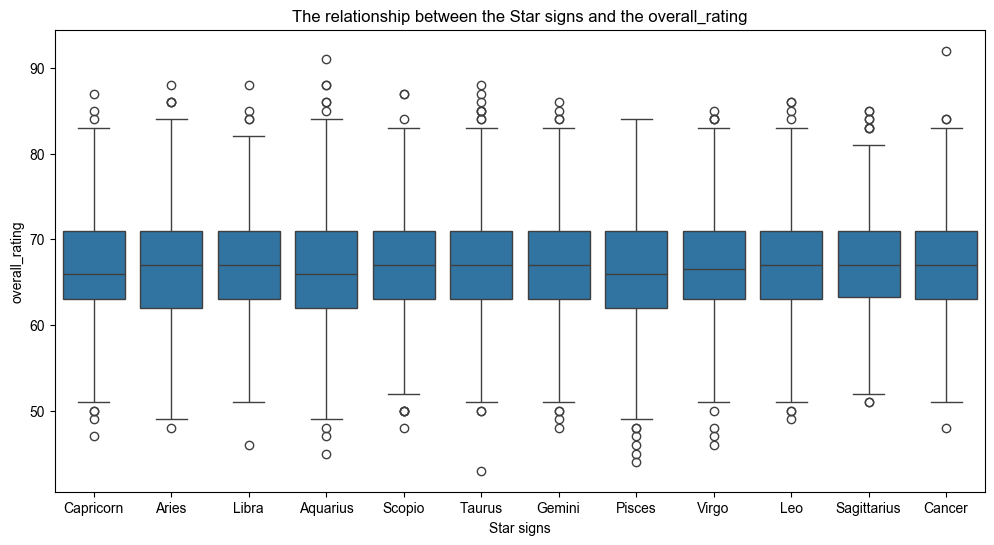

In [11]:
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

player = pd.read_csv("player_position_with_short.csv")

# 進行ANOVA分析
model=ols('overall_rating ~ C(star_sign)',\
          data=player).fit()
table1 = anova.anova_lm(model)
print(table1)

#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='star_sign', y='overall_rating', data=player)
plt.xlabel('Star signs')
plt.ylabel('overall_rating')
plt.title('The relationship between the Star signs and the overall_rating')

#### 進行ANOVA分析，12星座球員之間的「反應速度」有沒有顯著差異

                   df         sum_sq     mean_sq        F    PR(>F)
C(star_sign)     11.0    1398.950982  127.177362  1.93966  0.030162
Residual      11048.0  724382.509687   65.566846      NaN       NaN


Text(0.5, 1.0, 'The relationship between the Star signs and the reactions')

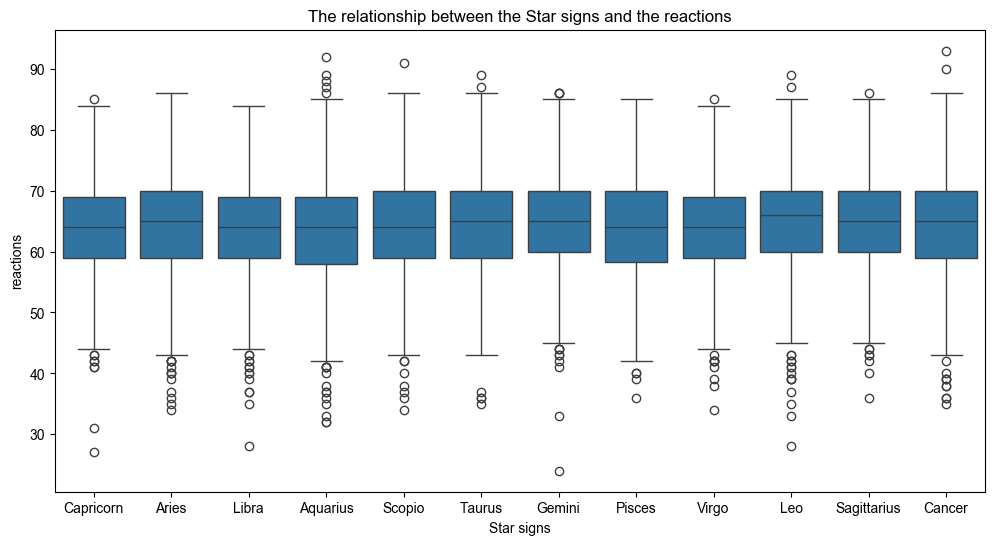

In [10]:
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

player = pd.read_csv("player_position_with_short.csv")

# 進行ANOVA分析
model=ols('reactions ~ C(star_sign)',\
          data=player).fit()
table1 = anova.anova_lm(model)
print(table1)

#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='star_sign', y='reactions', data=player)
plt.xlabel('Star signs')
plt.ylabel('reactions')
plt.title('The relationship between the Star signs and the reactions')

#### 進行ANOVA分析，12星座球員之間的「力量」有沒有顯著差異

                   df        sum_sq     mean_sq         F    PR(>F)
C(star_sign)     11.0  2.387247e+03  217.022434  1.794189  0.049236
Residual      11048.0  1.336350e+06  120.958522       NaN       NaN


Text(0.5, 1.0, 'The relationship between the Star signs and the strength')

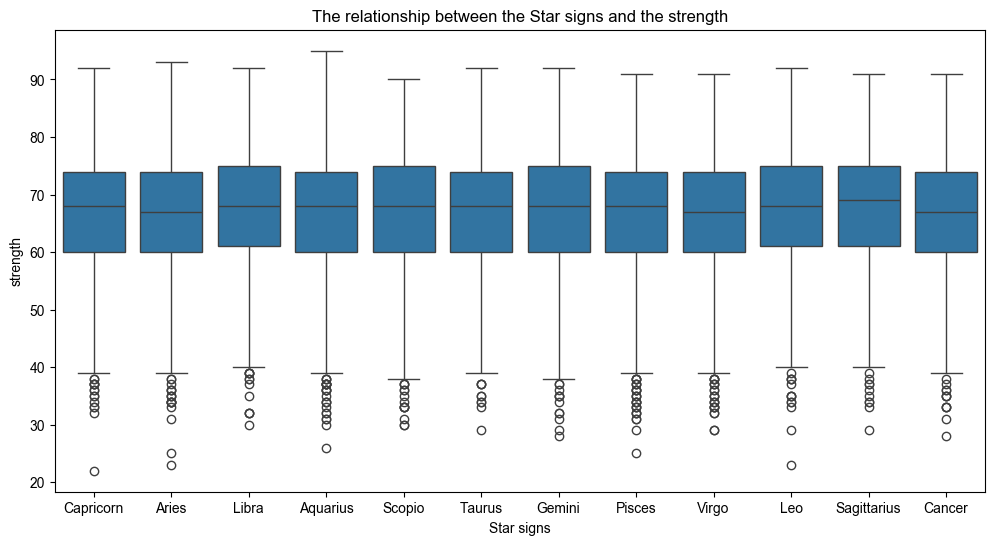

In [12]:
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

player = pd.read_csv("player_position_with_short.csv")

# 進行ANOVA分析
model=ols('strength ~ C(star_sign)',\
          data=player).fit()
table1 = anova.anova_lm(model)
print(table1)

#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='star_sign', y='strength', data=player)
plt.xlabel('Star signs')
plt.ylabel('strength')
plt.title('The relationship between the Star signs and the strength')

#### 進行ANOVA分析，12星座球員之間的「罰球數」有沒有顯著差異

                   df        sum_sq    mean_sq         F    PR(>F)
C(star_sign)     11.0  5.174141e+03  470.37650  2.457511  0.004578
Residual      11048.0  2.114627e+06  191.40361       NaN       NaN


Text(0.5, 1.0, 'The relationship between the Star signs and the penalties')

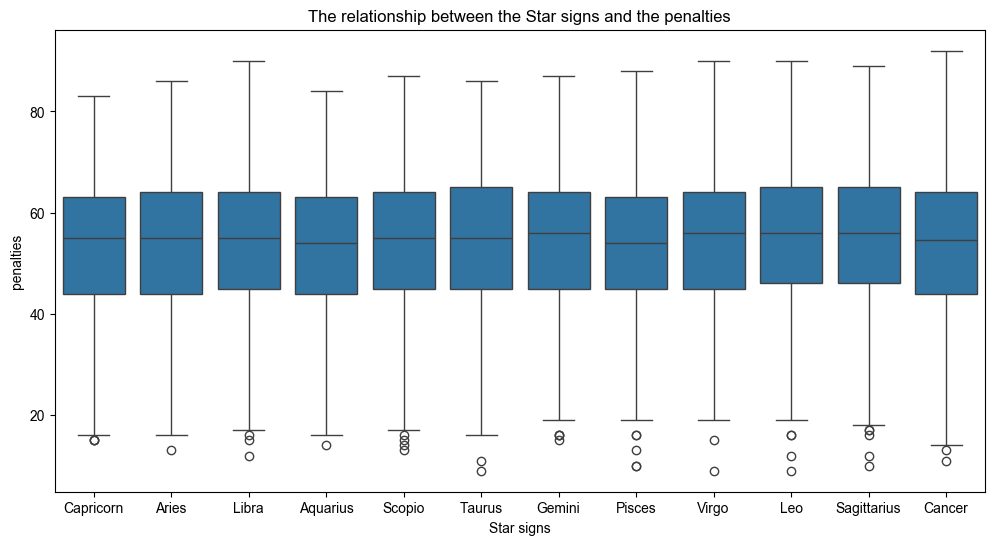

In [13]:
from statsmodels.formula.api import ols
import statsmodels.stats.anova as anova
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

player = pd.read_csv("player_position_with_short.csv")

# 進行ANOVA分析
model=ols('penalties ~ C(star_sign)',\
          data=player).fit()
table1 = anova.anova_lm(model)
print(table1)

#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='star_sign', y='penalties', data=player)
plt.xlabel('Star signs')
plt.ylabel('penalties')
plt.title('The relationship between the Star signs and the penalties')